In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

### Diabetes dataset

In [2]:
df = pd.read_csv('datasets/diabetes.csv')

#### Examine 3 specific columns of the dataset

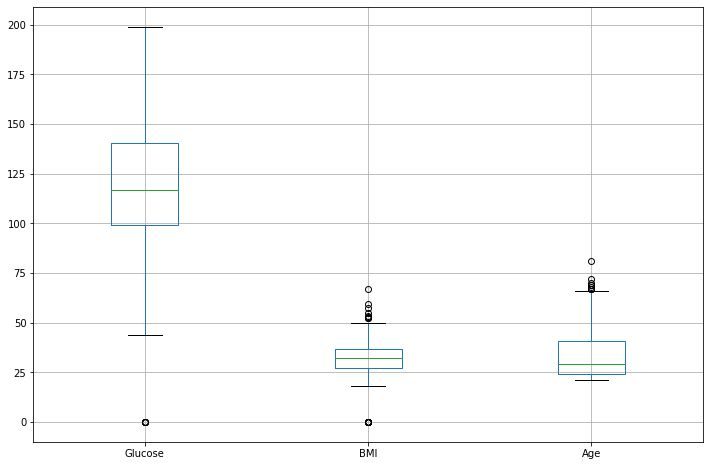

In [6]:
df.boxplot(column=['Glucose', 'BMI', 'Age'], 
                  figsize=(12, 8))

plt.show()

In [7]:
outcome = df['Outcome']

df = df.drop(['Outcome'], axis = 1)

#### Standard scaling
We will compare the standard scaling of these features with the robust scaling

In [8]:
scaled_df = pd.DataFrame(scale(df), columns=df.columns)

In [9]:
scaled_df[['Glucose', 'BMI', 'Age']].describe()

,Glucose,BMI,Age
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.614007e-18,2.295979e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-4.060474e+00,-1.041549e+00
25%,-6.852363e-01,-5.955785e-01,-7.862862e-01
50%,-1.218877e-01,9.419788e-04,-3.608474e-01
75%,6.057709e-01,5.847705e-01,6.602056e-01
max,2.444478e+00,4.455807e+00,4.063716e+00


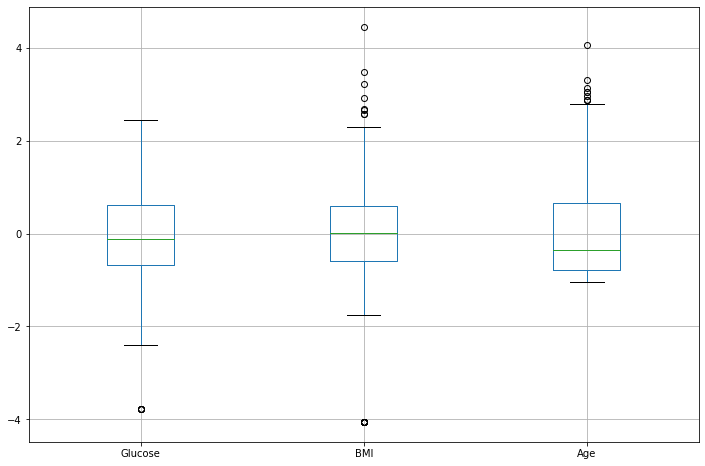

In [10]:
scaled_df.boxplot(column=['Glucose', 'BMI', 'Age'], 
                  figsize=(12, 8))

plt.show()

### Robust scaling
The values are scaled to be more robust to outliers. For this dataset, the values are similar to standard scaling, but in datasets with outliers which deviate even more from the mean, the results will be more apparent 

In [11]:
robust_scaled_df = pd.DataFrame(robust_scale(df), 
                                columns=df.columns)

#### Smaller range of values
Consider the Age column. Standard scaling produces a range [-1, 4] while robust scaling puts the values in a range [-0.5, 3.1]

In [12]:
robust_scaled_df[['Glucose', 'BMI', 'Age']].describe()

,Glucose,BMI,Age
count,768.000000,768.000000,768.000000
mean,0.094413,-0.000798,0.249464
std,0.775094,0.847759,0.691778
min,-2.836364,-3.440860,-0.470588
25%,-0.436364,-0.505376,-0.294118
50%,0.000000,0.000000,0.000000
75%,0.563636,0.494624,0.705882
max,1.987879,3.774194,3.058824


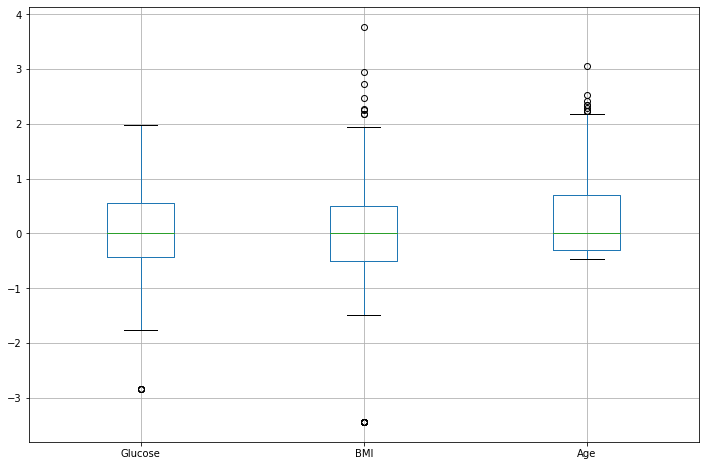

In [13]:
robust_scaled_df.boxplot(column=['Glucose', 'BMI', 'Age'], 
                         figsize=(12, 8))

plt.show()

#### The RobustScaler class

In [14]:
robust_scaler = RobustScaler(copy=True, 
                             with_centering=True, 
                             with_scaling=True)

robust_scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

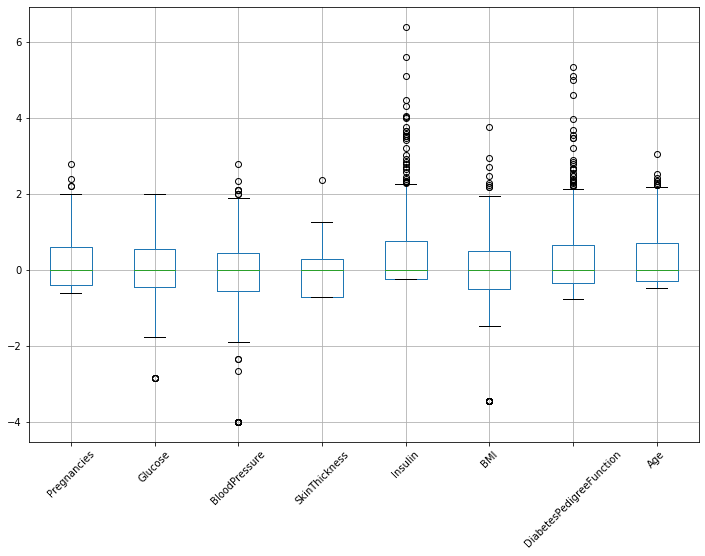

In [15]:
robust_scaled_array = robust_scaler.fit_transform(df)

robust_scaled_df = pd.DataFrame(robust_scaled_array,  
                                columns=df.columns)

robust_scaled_df.boxplot(figsize=(12, 8), rot = 45)

plt.show()